In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
snmpdata_names = sorted(glob.glob('data-Pittsburgh-10-12-18/*.snmp'))

In [2]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + float(s)
def overlap(a, b):
    # return the indices in a that overlap with b, also returns 
    # the corresponding index in b only works if both a and b are unique! 
    # This is not very efficient but it works
    bool_a = np.in1d(a,b)
    ind_a = np.arange(len(a))
    ind_a = ind_a[bool_a]

    ind_b = np.array([np.argwhere(b == a[x]) for x in ind_a]).flatten()
    return ind_a
def group_consecutives(vals,step = 1):
    run = []
    result = [run]
    expect = None
    for v in vals:
        if(v==expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v+step
    return result

In [3]:
Guest_time = {}
time_list = []
client_numberlist = []
for y in snmpdata_names[:]:
    connect_time = []
    TransFile = open(y)
    TransList = TransFile.readlines()
    half = int(len(TransList)/2)
    timest = y.split('-')
    times = timest[8]+':'+timest[9]+":"+timest[-1].split('.')[0]
    time_list.append(times)
    connect_time = [x.split(': ')[-1].split(' \n')[0] for x in TransList[:half] if "2.2.1.1.2.1.1.2." in x]
    clientnumber = [u.split(' ')[-1].split('\n')[0] for u in TransList[:half] if "2.2.1.4.1.1.0" in u]
    client_numberlist.append(int(clientnumber[0]))
    for x in connect_time:
        Guest_time.setdefault(x, []).append(times)

In [4]:
stay_interval = []
for x in Guest_time:
    ki = group_consecutives(overlap(time_list,Guest_time[x]))
#     print(len(ki))
    stay_interval.append(ki)
length_1 = []
length_2_5 = []
length_5_10 = []
length_10_20 = []
length_over_20 = []
for x in range(len(stay_interval)):
    if len(stay_interval[x])==1:
        length_1.append(stay_interval[x])
    elif len(stay_interval[x])>=2 and  len(stay_interval[x])<5:
        length_2_5.append(stay_interval[x])
    elif len(stay_interval[x])>=5 and  len(stay_interval[x])<10:
        length_5_10.append(stay_interval[x])
    elif len(stay_interval[x])>=10 and  len(stay_interval[x])<20:
        length_10_20.append(stay_interval[x])
    else:
        length_over_20.append(stay_interval[x])
#         print([len(y) for y in stay_interval[x]])

<IPython.core.display.Javascript object>


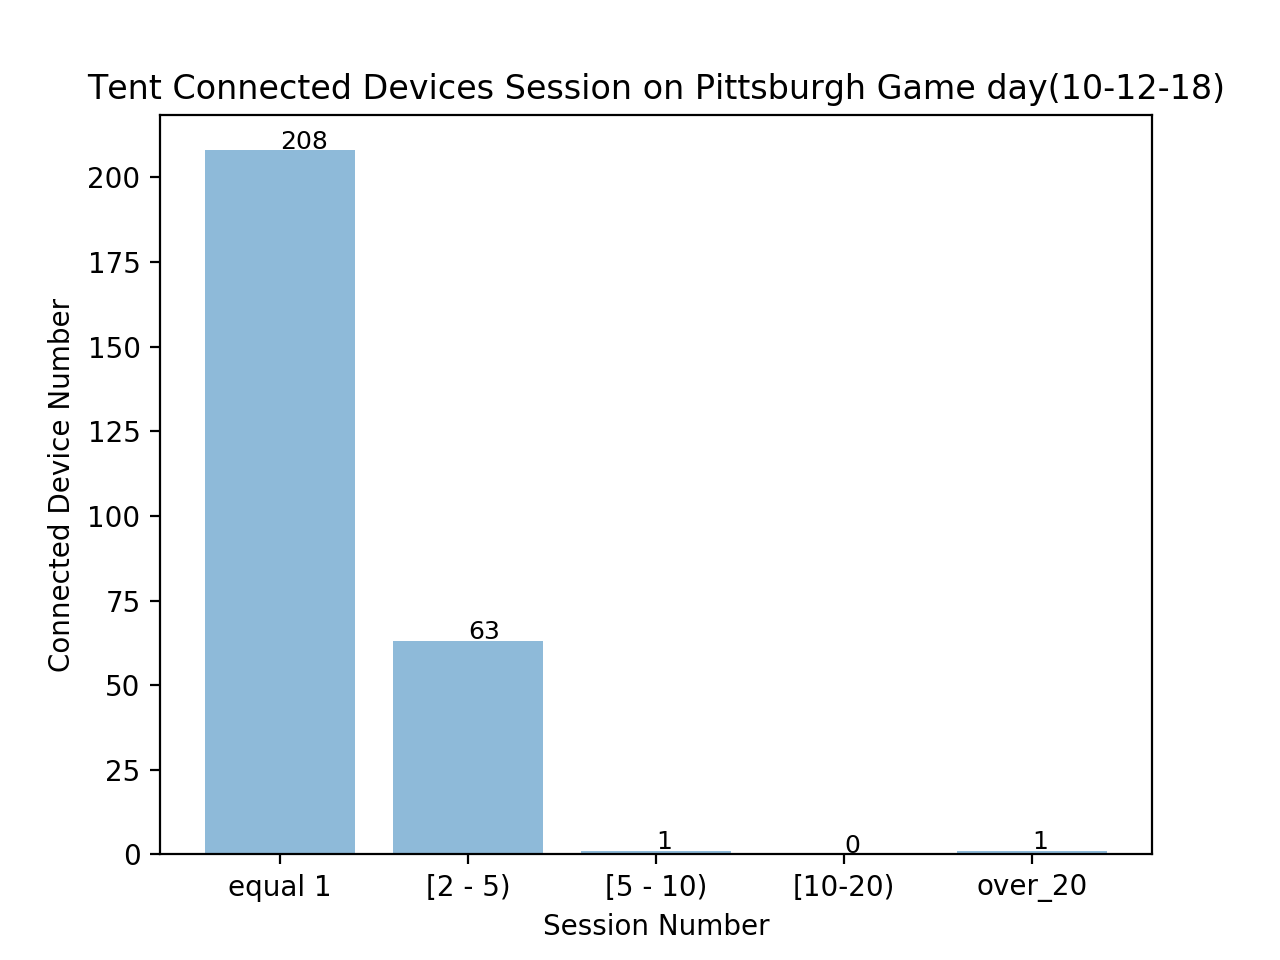

In [7]:
%matplotlib notebook 
objects = ('equal 1', '[2 - 5)', '[5 - 10)', '[10-20)', 'over_20')
y_pos = np.arange(len(objects))
performance = [len(length_1),len(length_2_5),len(length_5_10),len(length_10_20),len(length_over_20)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Connected Device Number')
plt.xlabel('Session Number')
plt.title('Tent Connected Devices Session on Pittsburgh Game day(10-12-18)')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)
# for i, v in enumerate(performance):
#     plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

<IPython.core.display.Javascript object>


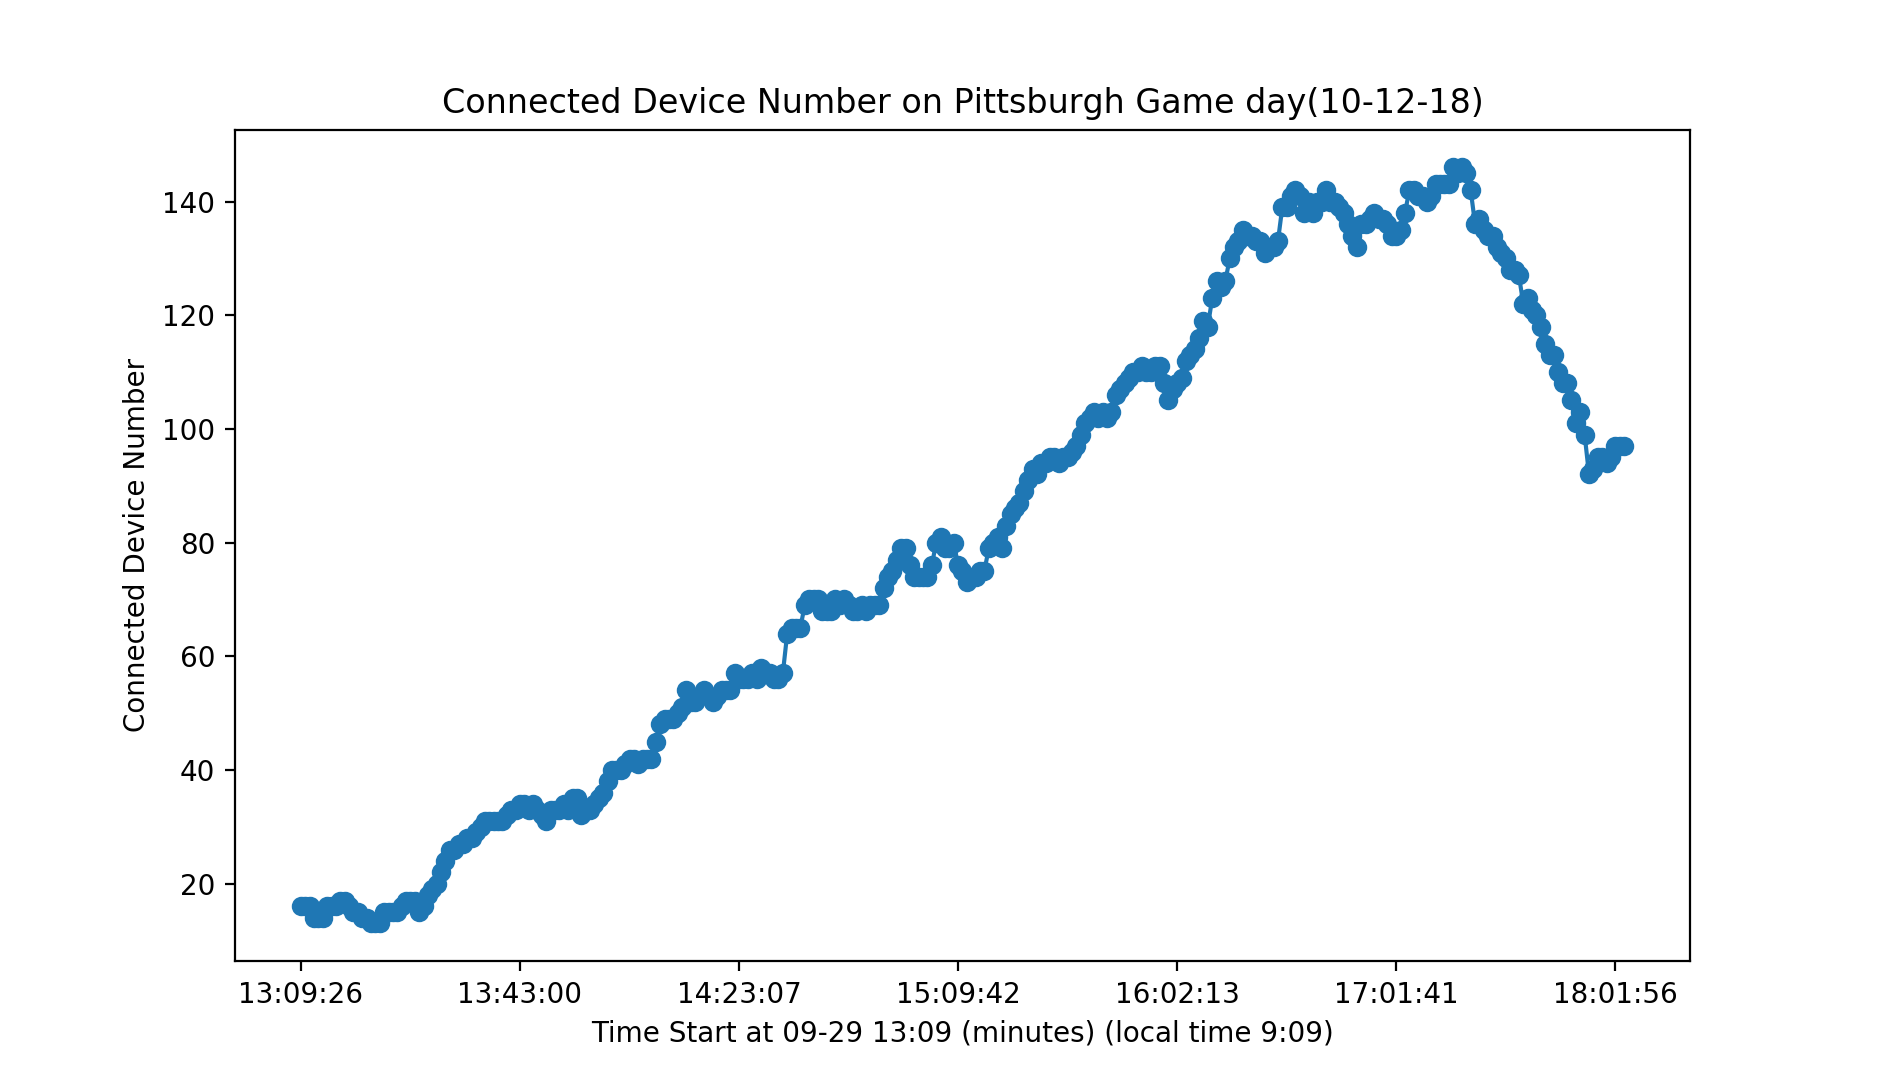

In [11]:
n = np.arange(len(time_list))
plt.plot(n,client_numberlist,'-o')
timeStart = '09-29 '+':'.join(time_list[0].split(':')[0:2])
plt.xticks([0, 50,100,150,200,250,300],[time_list[0],time_list[50],time_list[100],time_list[150],time_list[200],time_list[250],time_list[-1]],fontsize = 10)
plt.xlabel('Time Start at %s (minutes) (local time 9:09)'%timeStart)
plt.ylabel('Connected Device Number')
plt.title('Connected Device Number on Pittsburgh Game day(10-12-18)')
plt.show()

In [14]:
a = get_sec(time_list[-1]) - get_sec(time_list[263])
b = a/60
b

44.583333333333336